In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

%matplotlib inline 

from matplotlib import pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.preprocessing.image import ImageDataGenerator


learning_rate = 0.1

Training_iterations = 2500

Dropout = 0.5
batch = 30

Validation_size = 10000


In [2]:
data = pd.read_csv('./input/train.csv')

print('data({0[0]}, {0[1]})'.format(data.shape))
print(data.head())

data(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0  

In [3]:
images = data.iloc[:, 1:].values
images = images.astype(np.float)


print('images({0[0]}, {0[1]})'.format(images.shape))

images(42000, 784)


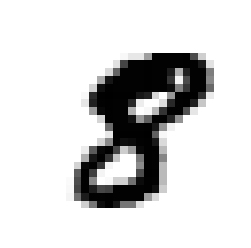

In [4]:
image_size = images.shape[1]

image_height = image_width = np.ceil(np.sqrt(image_size)).astype(np.uint8)

def display(img):
    
    image = img.reshape(image_width, image_height)
    
    plt.axis('off')
    plt.imshow(image, cmap=cm.binary)
    
display(images[10])

In [29]:
labels = data['label']

print ('labels[{0}] => {1}'.format(10,labels[10]))
print(labels.shape)

labels[10] => 8
(42000,)


In [30]:
labels_count = np.unique(labels).shape[0]

print (labels_count)

10


In [31]:
validation_images = images[:Validation_size]
validation_labels = labels[:Validation_size]

train_images = images[Validation_size:]
train_labels = labels[Validation_size:]

print('train_images({0[0]},{0[1]})'.format(train_images.shape))
print('validation_images({0[0]},{0[1]})'.format(validation_images.shape))

train_images(32000,784)
validation_images(10000,784)


In [32]:
def weight_variables(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [33]:
train_images = tf.reshape(train_images, [-1,image_width , image_height,1])
validation_images = tf.reshape(validation_images, [-1,image_width , image_height,1])

In [34]:
print(train_images.shape)
print(validation_images.shape)

(32000, 28, 28, 1)
(10000, 28, 28, 1)


In [35]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=False,
    vertical_flip=False,
    rotation_range = 20, 
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)

datagen.fit(train_images)
val_datagen.fit(validation_images)

In [36]:
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),
    tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),
    tf.keras.layers.Conv2D(256, (3,3), strides=1, padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 128)        

In [37]:
steps = train_images.shape[0] // 128

model.fit(
    datagen.flow(train_images, train_labels, batch_size=128),
    validation_data=val_datagen.flow(validation_images, validation_labels),
    epochs=30,
    steps_per_epoch=steps
)

Epoch 1/30
250/250 [==============================] - 16s 62ms/step - loss: 0.8711 - acc: 0.6923 - val_loss: 0.1668 - val_acc: 0.9498
Epoch 2/30
250/250 [==============================] - 17s 69ms/step - loss: 0.2162 - acc: 0.9333 - val_loss: 0.1446 - val_acc: 0.9578
Epoch 3/30
250/250 [==============================] - 17s 69ms/step - loss: 0.1565 - acc: 0.9521 - val_loss: 0.1100 - val_acc: 0.9672
Epoch 4/30
250/250 [==============================] - 17s 70ms/step - loss: 0.1258 - acc: 0.9616 - val_loss: 0.0730 - val_acc: 0.9769
Epoch 5/30
250/250 [==============================] - 17s 69ms/step - loss: 0.1051 - acc: 0.9680 - val_loss: 0.0844 - val_acc: 0.9732
Epoch 6/30
250/250 [==============================] - 17s 70ms/step - loss: 0.0983 - acc: 0.9703 - val_loss: 0.0492 - val_acc: 0.9830
Epoch 7/30
250/250 [==============================] - 18s 70ms/step - loss: 0.0949 - acc: 0.9720 - val_loss: 0.0540 - val_acc: 0.9822
Epoch 8/30
250/250 [==============================] - 18s 70ms

In [45]:
test = pd.read_csv('./input/test.csv')

test = tf.reshape(test, [-1,image_width , image_height,1])
test = test / 255
print(test.shape)

(28000, 28, 28, 1)


In [47]:
predicts = model.predict(test)
predicts = np.argmax(predicts,axis=1)
predicts = pd.Series(predicts, name="Label")
submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), predicts], axis=1)
submission.to_csv("submission.csv", index=False)